

#  Overview  

Intro: For my second project, I wanted to take a look at which home feature would offset its cost and possibly add value to the home.

I wanted to hone in on a overlooked feature, which homeowners don't see typically, as important to overall valuation. Aside from roof upgrades, kitchens upgrades, finishing out basements and adding bathrooms, I decided on driveways, since values were free off nulls and required just binary assignment. the column only has three driveway type categories, so it made it easier to drill down by Building type, Zoning, Building class etc..


# Problem Statement

I've been hired by Grimes Asphalt & Paving to explore the Ames Iowa dataset, in order to solicit customers within the city limits of Ames, Iowa. Utilizing EDA and a Predictive MODEL that supports an iOS App on the backend and targeted marketing campaign for potential clients.

Hypothesis: Does paving your driveway lead to statistically significant higher valuation overall and offset cost?

Ho : The average difference in SalePrice between Paved and Unpaved Driveways is Zero

Ha : The average difference in SalePrice between Paved and Unpaved Driveways is not Zero

Short answer: Yes, based on EDA but no based on 2 sample T test...coef of SalePrice does show it pays for itself.

# Qualitative Findings

• Often a driveway is an overlooked feature of a home

• Value is partially determined by the surrounding neighborhood, if your homes driveway is in bad shape and all others are in good shape, your home will have a lower perceived value

• Usually paving a driveway will give you a return of AT LEAST the cost of it being installed

• The average asphalt driveway costs about between $2,924 - $6,549 to install

• While it increases the value of your home, a nice paved driveway might also help sell your home FASTER


# Features


• **MSSubClass**: The building class -- Categorical

• **MSZoning: Identifies the general zoning classification of the sale -- Categorical

• **Neighborhood: Physical locations within Ames city limits -- Categorical Non ordinal

• **BldgType: Type of dwelling -- Categorical Non ordinal

• **OverallQual: Overall material and finish quality -- Categorical ordinal

• **YearBuilt: Original construction date -- Numeric ,Discrete , Int

• **1stFlrSF: First Floor square feet -- Numeric ,Continuous , Float

• **2ndFlrSF: Second floor square feet -- Numeric ,Continuous , Float

• **GarageArea: Size of garage in square feet -- Numeric ,Continuous , Float

• **PavedDrive: Paved driveway -- Categorical Non ordinal

• **LotArea: Lot size in square feet -- Numeric ,Continuous , Float

• **Total_sq: 1stFlrSF + 2ndFlrSF + GarageArea in square feet -- Numeric, Continuous, Float

• **Ratio_lotsq: LotArea / Total_sq in square feet -- Numeric ,Continuous , Float


# Model Metrics

     Metric  | Value
------------ | -------------
       MSE   | 651624374
       RMSE  | 25,526
       MSLE  | 25,526
       MAE   | 12,799
       R^2   | 0.8873
       Adj R | 0.8693

      Beta ( β) Coefficients
 ---------------- | -------------
Overall_Qual_10   | 651624374
Neighbor_StoneBr  | 25,526
     MS_Zoning_I  | 25,526
     1st_Flr_SF   | 12,799
 Paved_Driveway   | 0.8873




In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split , cross_val_score
from sklearn.linear_model import LinearRegression, ElasticNetCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import r2_score, mean_squared_error
import missingno as msno
from scipy import stats
from statsmodels.stats.weightstats import ztest 

sns.set_style('white')
%matplotlib inline

pd.options.display.max_columns = 100
pd.options.display.max_rows = 3000

# Inspect

In [2]:
path = './datasets/train.csv'
df_train = pd.read_csv(path)

df_train.columns = df_train.columns.str.replace(' ', '_')
df_train['2nd_Flr_SF'] = df_train['2nd_Flr_SF'].fillna(0)

In [3]:
# reads in values in certain cols and replaces them to NA
#pd.read_csv('data/citibike_feb2014.csv', na_values=r'\N')

In [4]:
df_train.shape

(2051, 81)

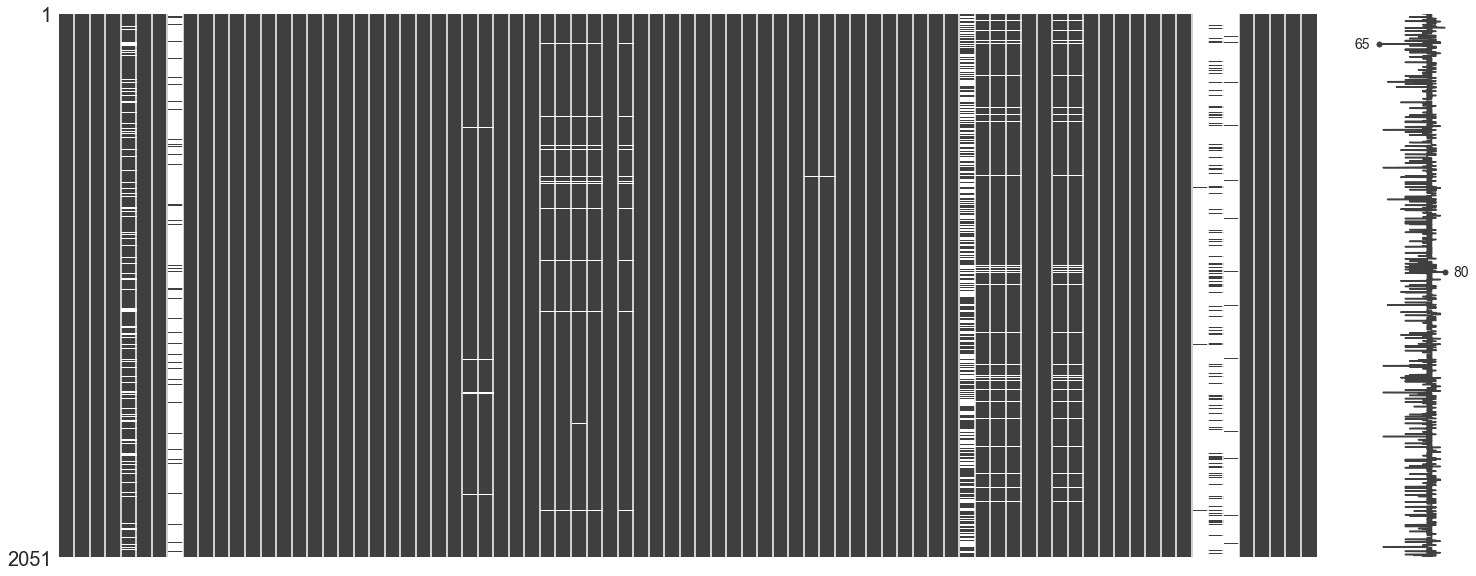

In [5]:
 msno.matrix(df_train);

In [6]:
path2 = './datasets/test.csv'
df_test = pd.read_csv(path2)

#df.columns = df.columns.str.strip().str.lower()
df_test.columns = df_test.columns.str.replace(' ', '_')
df_test['2nd_Flr_SF'] = df_test['2nd_Flr_SF'].fillna(0)



In [7]:
df_test.shape

(878, 80)

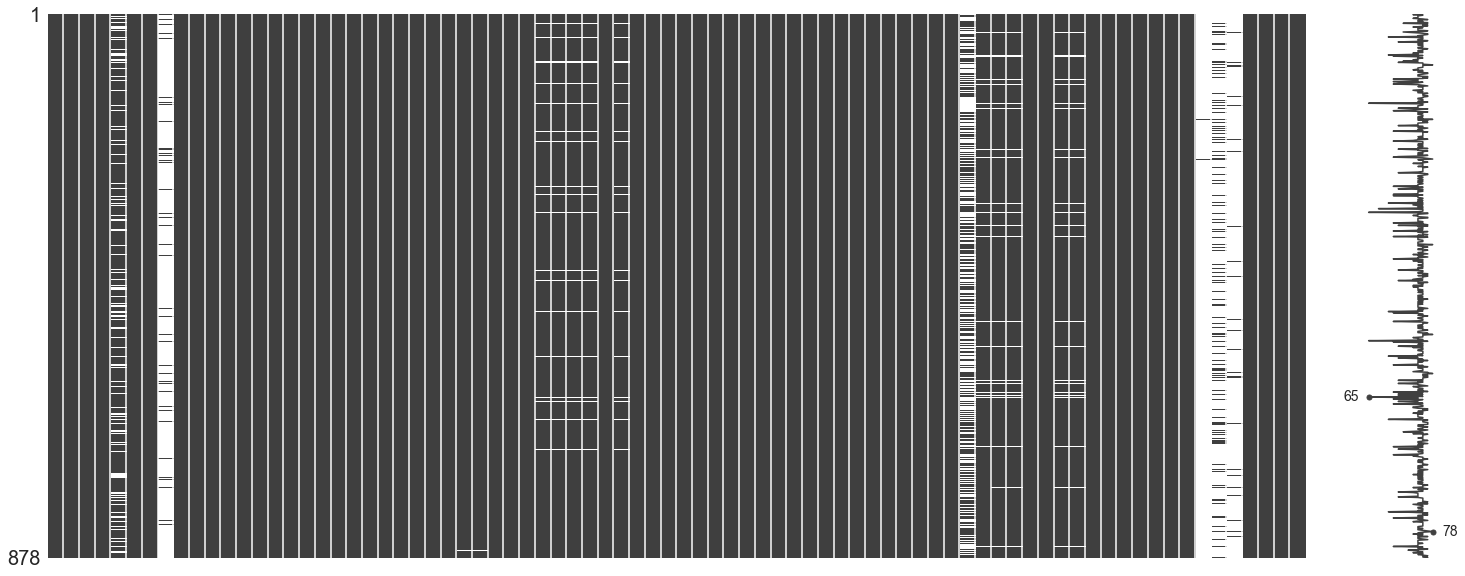

In [8]:
 msno.matrix(df_test);

# drop / do stuff to my columns

In [9]:
df_train.drop(columns=['PID','Lot_Frontage', 
       'Street','Lot_Shape', 'Land_Contour', 'Utilities',
       'Lot_Config', 'Land_Slope',  'Condition_1',
       'Condition_2', 'House_Style', 
       'Overall_Cond', 'Year_Remod/Add', 'Roof_Style',
       'Roof_Matl', 'Exterior_1st', 'Exterior_2nd', 'Mas_Vnr_Type',
       'Mas_Vnr_Area', 'Exter_Qual', 'Exter_Cond', 'Foundation', 'Bsmt_Qual',
       'Bsmt_Cond', 'Bsmt_Exposure', 'BsmtFin_Type_1', 'BsmtFin_SF_1',
       'BsmtFin_Type_2', 'BsmtFin_SF_2', 'Bsmt_Unf_SF', 'Total_Bsmt_SF',
       'Heating', 'Heating_QC', 'Central_Air', 'Electrical', 
        'Low_Qual_Fin_SF', 'Gr_Liv_Area', 'Bsmt_Full_Bath',
       'Bsmt_Half_Bath', 'Full_Bath', 'Half_Bath', 'Bedroom_AbvGr',
       'Kitchen_AbvGr', 'Kitchen_Qual', 'TotRms_AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace_Qu', 'Garage_Type', 'Garage_Yr_Blt',
       'Garage_Finish', 'Garage_Cars', 'Garage_Qual',
       'Garage_Cond', 'Wood_Deck_SF', 'Open_Porch_SF',
       'Enclosed_Porch', '3Ssn_Porch', 'Screen_Porch', 'Pool_Area', 'Pool_QC',
       'Fence', 'Misc_Feature', 'Misc_Val', 'Mo_Sold', 'Yr_Sold', 'Sale_Type'],inplace = True)

In [10]:
df_test.drop(columns=['PID','Lot_Frontage',
       'Street', 'Lot_Shape', 'Land_Contour', 'Utilities',
       'Lot_Config', 'Land_Slope',  'Condition_1',
       'Condition_2', 'House_Style', 
       'Overall_Cond', 'Year_Remod/Add', 'Roof_Style',
       'Roof_Matl', 'Exterior_1st', 'Exterior_2nd', 'Mas_Vnr_Type',
       'Mas_Vnr_Area', 'Exter_Qual', 'Exter_Cond', 'Foundation', 'Bsmt_Qual',
       'Bsmt_Cond', 'Bsmt_Exposure', 'BsmtFin_Type_1', 'BsmtFin_SF_1',
       'BsmtFin_Type_2', 'BsmtFin_SF_2', 'Bsmt_Unf_SF', 'Total_Bsmt_SF',
       'Heating', 'Heating_QC', 'Central_Air', 'Electrical', 
        'Low_Qual_Fin_SF', 'Gr_Liv_Area', 'Bsmt_Full_Bath',
       'Bsmt_Half_Bath', 'Full_Bath', 'Half_Bath', 'Bedroom_AbvGr',
       'Kitchen_AbvGr', 'Kitchen_Qual', 'TotRms_AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace_Qu', 'Garage_Type', 'Garage_Yr_Blt',
       'Garage_Finish', 'Garage_Cars', 'Garage_Qual',
       'Garage_Cond', 'Wood_Deck_SF', 'Open_Porch_SF',
       'Enclosed_Porch', '3Ssn_Porch', 'Screen_Porch', 'Pool_Area', 'Pool_QC',
       'Fence', 'Misc_Feature', 'Misc_Val', 'Mo_Sold', 'Yr_Sold', 'Sale_Type'],inplace = True)

In [11]:
df_train['Total_sq'] = df_train['1st_Flr_SF'] + df_train['2nd_Flr_SF'] + df_train['Garage_Area']
df_test['Total_sq'] = df_test['1st_Flr_SF'] + df_test['2nd_Flr_SF'] + df_test['Garage_Area']
df_train['Ratio_lotsq'] = df_train['Total_sq'] / df_train['Lot_Area']
df_test['Ratio_lotsq'] = df_test['Total_sq'] / df_test['Lot_Area']

def age(age_cell):
    return int(2010 - age_cell)

df_train['Age'] = df_train['Year_Built'].map(age)
df_test['Age'] = df_test['Year_Built'].map(age)

df_train['Paved_Drive'] = df_train['Paved_Drive'].replace(['N'],'Dirt/Gravel')
df_train['Paved_Drive'] = df_train['Paved_Drive'].replace(['P'],'Partial Paved')
df_train['Paved_Drive'] = df_train['Paved_Drive'].replace(['Y'],'Paved')

df_test['Paved_Drive'] = df_test['Paved_Drive'].replace(['N'],'Dirt/Gravel')
df_test['Paved_Drive'] = df_test['Paved_Drive'].replace(['P'],'Partial Paved')
df_test['Paved_Drive'] = df_test['Paved_Drive'].replace(['Y'],'Paved')


In [12]:
df_train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Id,2051.0,1474.033642,843.980841,1.000000,753.50000,1486.000000,2198.000000,2930.000000
MS_SubClass,2051.0,57.008776,42.824223,20.000000,20.00000,50.000000,70.000000,190.000000
Lot_Area,2051.0,10065.208191,6742.488909,1300.000000,7500.00000,9430.000000,11513.500000,159000.000000
Overall_Qual,2051.0,6.112140,1.426271,1.000000,5.00000,6.000000,7.000000,10.000000
Year_Built,2051.0,1971.708922,30.177889,1872.000000,1953.50000,1974.000000,2001.000000,2010.000000
1st_Flr_SF,2051.0,1164.488055,396.446923,334.000000,879.50000,1093.000000,1405.000000,5095.000000
2nd_Flr_SF,2051.0,329.329108,425.671046,0.000000,0.00000,0.000000,692.500000,1862.000000
Garage_Area,2050.0,473.671707,215.934561,0.000000,319.00000,480.000000,576.000000,1418.000000
SalePrice,2051.0,181469.701609,79258.659352,12789.000000,129825.00000,162500.000000,214000.000000,611657.000000
Total_sq,2050.0,1967.325854,634.043705,334.000000,1538.00000,1894.000000,2305.500000,7060.000000


In [13]:
df_train = df_train[df_train['MS_SubClass'] != 150]

In [14]:
#this contains 
df_train['Neighborhood'].value_counts().sort_values()

Landmrk      1
GrnHill      2
Greens       3
Blueste      6
Veenker     17
NPkVill     17
BrDale      19
Blmngtn     22
MeadowV     24
ClearCr     26
SWISU       32
StoneBr     38
Timber      48
NoRidge     48
IDOTRR      69
Crawfor     71
BrkSide     76
Mitchel     82
NWAmes      87
SawyerW     87
Sawyer     111
Gilbert    116
NridgHt    122
Somerst    130
Edwards    143
OldTown    163
CollgCr    180
NAmes      310
Name: Neighborhood, dtype: int64

In [15]:
df_train = df_train[df_train['Neighborhood'] != "Landmrk"]
df_train = df_train[df_train['Neighborhood'] != "GrnHill"]

In [16]:
df_train['Alley'] = df_train['Alley'].isna()

In [17]:
df_train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Id,2047.0,1471.701514,843.083460,1.000000,752.500000,1480.000000,2193.500000,2930.000000
MS_SubClass,2047.0,56.851490,42.710481,20.000000,20.000000,50.000000,70.000000,190.000000
Lot_Area,2047.0,10073.487054,6744.904451,1300.000000,7500.000000,9434.000000,11520.500000,159000.000000
Overall_Qual,2047.0,6.110894,1.427257,1.000000,5.000000,6.000000,7.000000,10.000000
Year_Built,2047.0,1971.674646,30.195885,1872.000000,1953.000000,1974.000000,2001.000000,2010.000000
1st_Flr_SF,2047.0,1164.659502,396.527705,334.000000,879.500000,1093.000000,1405.000000,5095.000000
2nd_Flr_SF,2047.0,329.303371,425.817310,0.000000,0.000000,0.000000,694.500000,1862.000000
Garage_Area,2046.0,473.848974,216.075395,0.000000,319.250000,480.000000,576.000000,1418.000000
SalePrice,2047.0,181411.313141,79251.361316,12789.000000,129650.000000,162500.000000,214000.000000,611657.000000
Total_sq,2046.0,1967.648583,634.590023,334.000000,1538.000000,1895.000000,2306.750000,7060.000000


In [18]:
df_train['Bldg_Type'].value_counts().sort_values().count()

5

In [19]:
df_train['Overall_Qual'].value_counts().sort_values()

1       4
2       9
10     23
3      29
9      77
4     159
8     250
7     428
6     505
5     563
Name: Overall_Qual, dtype: int64

In [20]:
df_train = df_train[df_train['Overall_Qual'] > 1]

In [21]:
df_train['Overall_Qual'].value_counts().sort_values()

2       9
10     23
3      29
9      77
4     159
8     250
7     428
6     505
5     563
Name: Overall_Qual, dtype: int64

In [22]:
df_train['MS_Zoning'] = df_train['MS_Zoning'].replace(["I (all)"],'I')
df_train['MS_Zoning'] = df_train['MS_Zoning'].replace(["C (all)"],'C')
df_train['MS_Zoning'] = df_train['MS_Zoning'].replace(["A (agr)"],'A')

In [23]:
df_train['SalePrice'] = df_train['SalePrice'].map(np.log)
df_train['1st_Flr_SF'] = df_train['1st_Flr_SF'].map(np.log)
df_train['2nd_Flr_SF'] = df_train['2nd_Flr_SF'].map(np.log)
df_train['Lot_Area'] = df_train['Lot_Area'].map(np.log)
df_train['Garage_Area'] = df_train['Garage_Area'].map(np.log)
df_train['Total_sq'] = df_train['Total_sq'].map(np.log)


/Users/j_b/opt/anaconda3/lib/python3.8/site-packages/pandas/core/base.py:1145: RuntimeWarning: divide by zero encountered in log
  new_values = map_f(values, mapper)


In [24]:
df_train.replace([np.inf, -np.inf], 0, inplace=True) 

In [25]:
df_train = df_train.drop_duplicates()

In [26]:
df_train.replace(np.nan, 0, inplace=True)

In [27]:
df_copy = df_train.copy()

df_copy = df_copy.drop(columns=['SalePrice','Id','Year_Built'])

df_copy.head().transpose()

,0,1,2,3,4
MS_SubClass,60,60,20,60,50
MS_Zoning,RL,RL,RL,RL,RL
Lot_Area,9.5117,9.34941,8.9774,9.19034,9.56346
Alley,True,True,True,True,True
Neighborhood,Sawyer,SawyerW,NAmes,Timber,SawyerW
Bldg_Type,1Fam,1Fam,1Fam,1Fam,1Fam
Overall_Qual,6,7,5,5,6
1st_Flr_SF,6.58617,6.81674,6.96319,6.61204,6.72263
2nd_Flr_SF,6.62539,7.09755,0,6.55108,6.41999
Garage_Area,6.16331,6.32615,5.50533,5.99146,6.18208


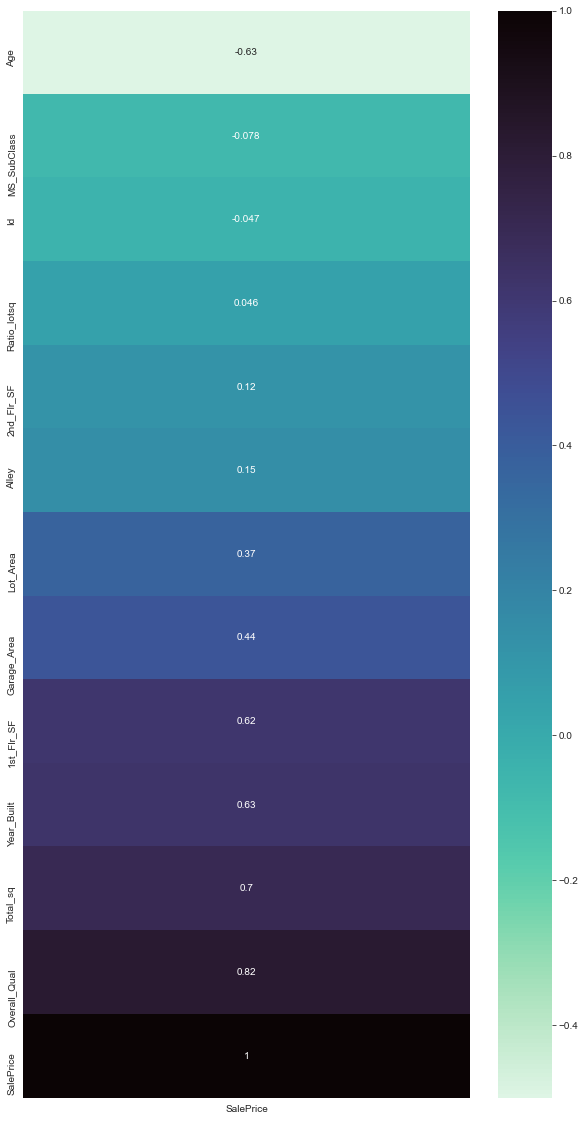

In [28]:
fig, ax = plt.subplots(figsize=(10,20))  
sns.heatmap(df_train.corr()[['SalePrice']].sort_values('SalePrice'),
            annot=True,vmin=-.5,vmax=1,cmap='mako_r',robust=True,ax=ax);

In [29]:
df_test['MS_SubClass'].value_counts().sort_values()

40       2
180      6
75       7
45       7
190     15
85      20
80      32
90      34
70      38
30      38
160     41
120     60
50      89
60     180
20     309
Name: MS_SubClass, dtype: int64

In [30]:
df_test['Neighborhood'].value_counts().sort_values

<bound method Series.sort_values of NAmes      133
CollgCr     87
OldTown     76
Somerst     52
Edwards     50
Gilbert     49
NridgHt     44
NWAmes      44
Sawyer      40
SawyerW     38
Crawfor     32
BrkSide     32
Mitchel     32
IDOTRR      24
Timber      24
NoRidge     23
ClearCr     17
SWISU       16
StoneBr     13
MeadowV     13
BrDale      11
Veenker      7
NPkVill      6
Blmngtn      6
Greens       5
Blueste      4
Name: Neighborhood, dtype: int64>

In [31]:
df_test['Bldg_Type'].value_counts().sort_values().count()

5

In [32]:
df_test['Overall_Qual'].value_counts().sort_values()

2       4
10      7
3      11
9      30
4      67
8     100
7     171
6     226
5     262
Name: Overall_Qual, dtype: int64

In [33]:
df_test['MS_Zoning'] = df_test['MS_Zoning'].replace(["I (all)"],'I')
df_test['MS_Zoning'] = df_test['MS_Zoning'].replace(["C (all)"],'C')
df_test['MS_Zoning'] = df_test['MS_Zoning'].replace(["A (agr)"],'A')

In [34]:
df_test['1st_Flr_SF'] = df_test['1st_Flr_SF'].map(np.log)
df_test['2nd_Flr_SF'] = df_test['2nd_Flr_SF'].map(np.log)
df_test['Lot_Area'] = df_test['Lot_Area'].map(np.log)
df_test['Garage_Area'] = df_test['Garage_Area'].map(np.log)
df_test['Total_sq'] = df_test['Total_sq'].map(np.log)

/Users/j_b/opt/anaconda3/lib/python3.8/site-packages/pandas/core/base.py:1145: RuntimeWarning: divide by zero encountered in log
  new_values = map_f(values, mapper)


In [35]:
df_test['Alley'] = df_test['Alley'].isna()

In [36]:
df_test.replace([np.inf, -np.inf], 0, inplace=True) 

In [37]:
df_test = df_test.drop_duplicates()

In [38]:
#df_test['Alley'] = df_test['Alley'].isna()

In [39]:
df_test.head()

,Id,MS_SubClass,MS_Zoning,Lot_Area,Alley,Neighborhood,Bldg_Type,Overall_Qual,Year_Built,1st_Flr_SF,2nd_Flr_SF,Garage_Area,Paved_Drive,Total_sq,Ratio_lotsq,Age
0,2658,190,RM,9.120634,False,OldTown,2fmCon,6,1910,6.811244,6.927558,6.086775,Paved,7.769801,0.259024,100
1,2718,90,RL,9.175956,True,Sawyer,Duplex,5,1977,7.584265,0.000000,6.363028,Paved,7.842671,0.263610,33
2,2414,60,RL,9.747068,True,Gilbert,1Fam,7,2006,6.498282,6.723832,6.054439,Paved,7.561122,0.112371,4
3,1989,30,RM,9.050172,True,OldTown,1Fam,5,1923,6.875232,0.000000,6.173786,Dirt/Gravel,7.277939,0.169953,87
4,625,20,RL,9.159047,True,NAmes,1Fam,6,1963,7.239933,0.000000,6.242223,Paved,7.553811,0.200842,47


#explore diffs between cols in my two dfs

In [40]:
# need to drop for now it remove dummy erorr
set(df_train.Neighborhood).symmetric_difference(df_test.Neighborhood)

set()

In [41]:
# need to add now it remove dummy eror
set(df_train.MS_Zoning).symmetric_difference(df_test.MS_Zoning)

set()

In [42]:
# 
set(df_train.MS_SubClass).symmetric_difference(df_test.MS_SubClass)

set()

In [43]:
set(df_train.Overall_Qual).symmetric_difference(df_test.Overall_Qual)

set()

In [44]:
set(df_train.Paved_Drive).symmetric_difference(df_test.Paved_Drive)

#df_test['Paved_Drive']

set()

In [45]:
df_train.head()

,Id,MS_SubClass,MS_Zoning,Lot_Area,Alley,Neighborhood,Bldg_Type,Overall_Qual,Year_Built,1st_Flr_SF,2nd_Flr_SF,Garage_Area,Paved_Drive,SalePrice,Total_sq,Ratio_lotsq,Age
0,109,60,RL,9.511703,True,Sawyer,1Fam,6,1976,6.586172,6.625392,6.163315,Paved,11.779129,7.577634,0.144559,34
1,544,60,RL,9.349406,True,SawyerW,1Fam,7,1996,6.816736,7.097549,6.326149,Paved,12.301383,7.893945,0.233293,14
2,153,20,RL,8.977399,True,NAmes,1Fam,5,1953,6.963190,0.000000,5.505332,Paved,11.599103,7.172425,0.164479,57
3,318,60,RL,9.190342,True,Timber,1Fam,5,2006,6.612041,6.551080,5.991465,Paved,12.066811,7.519692,0.188125,4
4,255,50,RL,9.563459,True,SawyerW,1Fam,6,1900,6.722630,6.419995,6.182085,Dirt/Gravel,11.838626,7.564757,0.135511,110


In [46]:
df_test.head()

,Id,MS_SubClass,MS_Zoning,Lot_Area,Alley,Neighborhood,Bldg_Type,Overall_Qual,Year_Built,1st_Flr_SF,2nd_Flr_SF,Garage_Area,Paved_Drive,Total_sq,Ratio_lotsq,Age
0,2658,190,RM,9.120634,False,OldTown,2fmCon,6,1910,6.811244,6.927558,6.086775,Paved,7.769801,0.259024,100
1,2718,90,RL,9.175956,True,Sawyer,Duplex,5,1977,7.584265,0.000000,6.363028,Paved,7.842671,0.263610,33
2,2414,60,RL,9.747068,True,Gilbert,1Fam,7,2006,6.498282,6.723832,6.054439,Paved,7.561122,0.112371,4
3,1989,30,RM,9.050172,True,OldTown,1Fam,5,1923,6.875232,0.000000,6.173786,Dirt/Gravel,7.277939,0.169953,87
4,625,20,RL,9.159047,True,NAmes,1Fam,6,1963,7.239933,0.000000,6.242223,Paved,7.553811,0.200842,47


In [47]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2043 entries, 0 to 2050
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            2043 non-null   int64  
 1   MS_SubClass   2043 non-null   int64  
 2   MS_Zoning     2043 non-null   object 
 3   Lot_Area      2043 non-null   float64
 4   Alley         2043 non-null   bool   
 5   Neighborhood  2043 non-null   object 
 6   Bldg_Type     2043 non-null   object 
 7   Overall_Qual  2043 non-null   int64  
 8   Year_Built    2043 non-null   int64  
 9   1st_Flr_SF    2043 non-null   float64
 10  2nd_Flr_SF    2043 non-null   float64
 11  Garage_Area   2043 non-null   float64
 12  Paved_Drive   2043 non-null   object 
 13  SalePrice     2043 non-null   float64
 14  Total_sq      2043 non-null   float64
 15  Ratio_lotsq   2043 non-null   float64
 16  Age           2043 non-null   int64  
dtypes: bool(1), float64(7), int64(5), object(4)
memory usage: 273.3+ KB


In [48]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 878 entries, 0 to 877
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            878 non-null    int64  
 1   MS_SubClass   878 non-null    int64  
 2   MS_Zoning     878 non-null    object 
 3   Lot_Area      878 non-null    float64
 4   Alley         878 non-null    bool   
 5   Neighborhood  878 non-null    object 
 6   Bldg_Type     878 non-null    object 
 7   Overall_Qual  878 non-null    int64  
 8   Year_Built    878 non-null    int64  
 9   1st_Flr_SF    878 non-null    float64
 10  2nd_Flr_SF    878 non-null    float64
 11  Garage_Area   878 non-null    float64
 12  Paved_Drive   878 non-null    object 
 13  Total_sq      878 non-null    float64
 14  Ratio_lotsq   878 non-null    float64
 15  Age           878 non-null    int64  
dtypes: bool(1), float64(6), int64(5), object(4)
memory usage: 110.6+ KB


In [49]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2043 entries, 0 to 2050
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            2043 non-null   int64  
 1   MS_SubClass   2043 non-null   int64  
 2   MS_Zoning     2043 non-null   object 
 3   Lot_Area      2043 non-null   float64
 4   Alley         2043 non-null   bool   
 5   Neighborhood  2043 non-null   object 
 6   Bldg_Type     2043 non-null   object 
 7   Overall_Qual  2043 non-null   int64  
 8   Year_Built    2043 non-null   int64  
 9   1st_Flr_SF    2043 non-null   float64
 10  2nd_Flr_SF    2043 non-null   float64
 11  Garage_Area   2043 non-null   float64
 12  Paved_Drive   2043 non-null   object 
 13  SalePrice     2043 non-null   float64
 14  Total_sq      2043 non-null   float64
 15  Ratio_lotsq   2043 non-null   float64
 16  Age           2043 non-null   int64  
dtypes: bool(1), float64(7), int64(5), object(4)
memory usage: 273.3+ KB


In [50]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 878 entries, 0 to 877
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            878 non-null    int64  
 1   MS_SubClass   878 non-null    int64  
 2   MS_Zoning     878 non-null    object 
 3   Lot_Area      878 non-null    float64
 4   Alley         878 non-null    bool   
 5   Neighborhood  878 non-null    object 
 6   Bldg_Type     878 non-null    object 
 7   Overall_Qual  878 non-null    int64  
 8   Year_Built    878 non-null    int64  
 9   1st_Flr_SF    878 non-null    float64
 10  2nd_Flr_SF    878 non-null    float64
 11  Garage_Area   878 non-null    float64
 12  Paved_Drive   878 non-null    object 
 13  Total_sq      878 non-null    float64
 14  Ratio_lotsq   878 non-null    float64
 15  Age           878 non-null    int64  
dtypes: bool(1), float64(6), int64(5), object(4)
memory usage: 110.6+ KB


# Features engineering


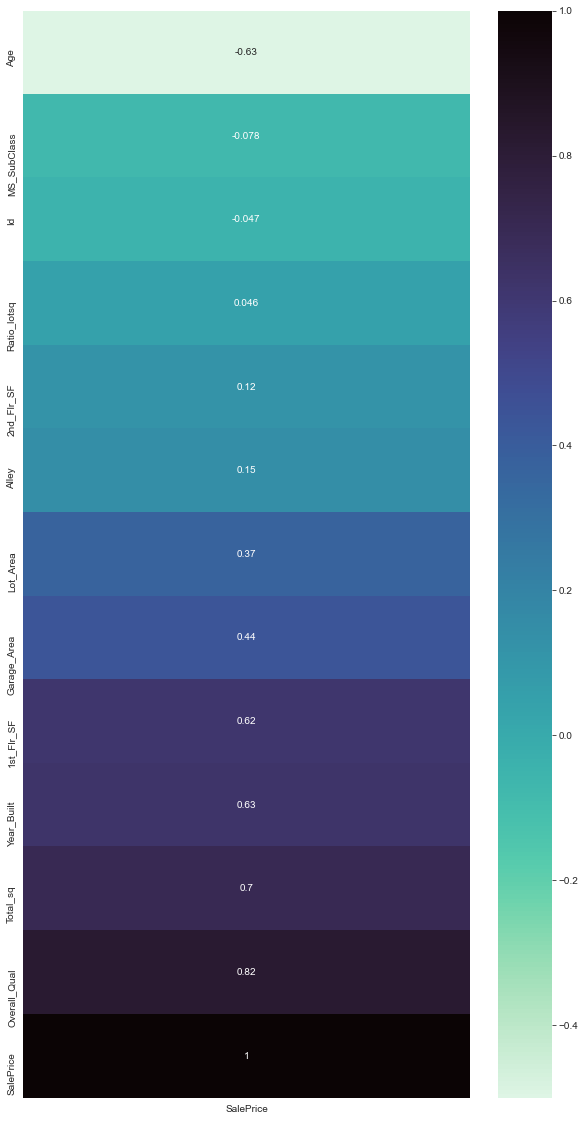

In [51]:
fig, ax = plt.subplots(figsize=(10,20))  
sns.heatmap(df_train.corr()[['SalePrice']].sort_values('SalePrice'),
            annot=True,vmin=-.5,vmax=1,cmap='mako_r',robust=True,ax=ax);

In [52]:
df_train = pd.get_dummies(df_train,columns=['MS_SubClass','MS_Zoning','Neighborhood',
                                            'Bldg_Type','Overall_Qual','Paved_Drive','Alley']
                            ,drop_first=False)

df_test = pd.get_dummies(df_test,columns=['MS_SubClass','MS_Zoning','Neighborhood',
                                            'Bldg_Type','Overall_Qual','Paved_Drive','Alley']
                            ,drop_first=False)

In [53]:
df_train.head(20)

,Id,Lot_Area,Year_Built,1st_Flr_SF,2nd_Flr_SF,Garage_Area,SalePrice,Total_sq,Ratio_lotsq,Age,MS_SubClass_20,MS_SubClass_30,MS_SubClass_40,MS_SubClass_45,MS_SubClass_50,MS_SubClass_60,MS_SubClass_70,MS_SubClass_75,MS_SubClass_80,MS_SubClass_85,MS_SubClass_90,MS_SubClass_120,MS_SubClass_160,MS_SubClass_180,MS_SubClass_190,MS_Zoning_C,MS_Zoning_FV,MS_Zoning_I,MS_Zoning_RH,MS_Zoning_RL,MS_Zoning_RM,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Bldg_Type_1Fam,Bldg_Type_2fmCon,Bldg_Type_Duplex,Bldg_Type_Twnhs,Bldg_Type_TwnhsE,Overall_Qual_2,Overall_Qual_3,Overall_Qual_4,Overall_Qual_5,Overall_Qual_6,Overall_Qual_7,Overall_Qual_8,Overall_Qual_9,Overall_Qual_10,Paved_Drive_Dirt/Gravel,Paved_Drive_Partial Paved,Paved_Drive_Paved,Alley_False,Alley_True
0,109,9.511703,1976,6.586172,6.625392,6.163315,11.779129,7.577634,0.144559,34,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1
1,544,9.349406,1996,6.816736,7.097549,6.326149,12.301383,7.893945,0.233293,14,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1
2,153,8.977399,1953,6.963190,0.000000,5.505332,11.599103,7.172425,0.164479,57,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1
3,318,9.190342,2006,6.612041,6.551080,5.991465,12.066811,7.519692,0.188125,4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1
4,255,9.563459,1900,6.722630,6.419995,6.182085,11.838626,7.564757,0.135511,110,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1
5,138,9.710631,1966,7.543273,0.000000,6.359574,12.154779,7.810353,0.149527,44,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1
6,2827,8.209308,2005,6.977281,0.000000,6.263398,11.849398,7.375882,0.434558,5,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1
7,145,9.405907,1959,7.080026,0.000000,6.274762,11.863582,7.449498,0.141365,51,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1
8,1942,9.666689,1952,6.828712,0.000000,6.040255,11.630709,7.203406,0.085155,58,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1
9,1956,9.359277,1969,6.946976,6.946976,6.222576,11.813030,7.857094,0.222643,41,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1


In [54]:
df_test.head(20)

,Id,Lot_Area,Year_Built,1st_Flr_SF,2nd_Flr_SF,Garage_Area,Total_sq,Ratio_lotsq,Age,MS_SubClass_20,MS_SubClass_30,MS_SubClass_40,MS_SubClass_45,MS_SubClass_50,MS_SubClass_60,MS_SubClass_70,MS_SubClass_75,MS_SubClass_80,MS_SubClass_85,MS_SubClass_90,MS_SubClass_120,MS_SubClass_160,MS_SubClass_180,MS_SubClass_190,MS_Zoning_C,MS_Zoning_FV,MS_Zoning_I,MS_Zoning_RH,MS_Zoning_RL,MS_Zoning_RM,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Bldg_Type_1Fam,Bldg_Type_2fmCon,Bldg_Type_Duplex,Bldg_Type_Twnhs,Bldg_Type_TwnhsE,Overall_Qual_2,Overall_Qual_3,Overall_Qual_4,Overall_Qual_5,Overall_Qual_6,Overall_Qual_7,Overall_Qual_8,Overall_Qual_9,Overall_Qual_10,Paved_Drive_Dirt/Gravel,Paved_Drive_Partial Paved,Paved_Drive_Paved,Alley_False,Alley_True
0,2658,9.120634,1910,6.811244,6.927558,6.086775,7.769801,0.259024,100,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0
1,2718,9.175956,1977,7.584265,0.000000,6.363028,7.842671,0.263610,33,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1
2,2414,9.747068,2006,6.498282,6.723832,6.054439,7.561122,0.112371,4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1
3,1989,9.050172,1923,6.875232,0.000000,6.173786,7.277939,0.169953,87,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1
4,625,9.159047,1963,7.239933,0.000000,6.242223,7.553811,0.200842,47,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1
5,333,7.544332,1972,6.302619,6.302619,5.655992,7.228388,0.729101,38,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1
6,1327,9.049702,1958,6.996681,0.000000,5.730100,7.244942,0.164514,52,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1
7,858,9.136263,1977,7.145196,0.000000,5.529429,7.326466,0.163687,33,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1
8,95,8.164795,2004,6.733402,6.733402,6.376727,7.726654,0.645235,6,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0
9,1568,9.222763,1977,7.153834,0.000000,6.159095,7.468513,0.173037,33,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1


# 2 T_test

In [57]:

ctrl = df_train.loc[df_train["Paved_Drive_Paved"] == 1, "SalePrice"]
trt = df_train.loc[df_train["Paved_Drive_Dirt/Gravel"] == 1, "SalePrice"]

t_stat, p_value = ztest(ctrl, trt)
print("----- Z Test Results -----")
print("T stat. = " + str(t_stat))
print("P value = " + str(p_value)) # P-value is less than 0.05

----- Z Test Results -----
T stat. = 18.049466883837738
P value = 7.965586474804497e-73


In [58]:
stats.ttest_ind(ctrl, trt, equal_var=False)

Ttest_indResult(statistic=16.725146259731737, pvalue=1.557567686033849e-37)

In [59]:
t_stat, p_value = stats.ttest_ind(trt, ctrl, equal_var=False)

In [60]:
t_stat

-16.725146259731737

In [61]:
p_value

1.557567686033849e-37

# instan/ Train-Test-Split/ Fit

In [62]:
X = df_train._get_numeric_data().drop(columns=['SalePrice','Id','Year_Built']) # if my df only has numeric cols and my target
features = list(X.columns)
y = df_train['SalePrice']

lr = LinearRegression()

cross_val_score(lr, X, y).mean() 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

# baseline score
saleprice_base = np.exp(y_test.mean())
saleprice_base


167799.42706436172

In [63]:
# examine over/underfit
cross_val_score(lr, X_train, y_train).mean() 
#cross_val_score(knn, X_train, y_train).mean() , #cross_val_score(knn, X_test, y_test).mean()
#cross_val_score(en, X_train, y_train).mean() , #cross_val_score(en, X_test, y_test).mean()

0.8183168509341989

In [64]:
# Now that I'm happy with my scores, fit my model
lr.fit(X_train,y_train)
#knn.fit(X_train,y_train)
#en.fit(X_train,y_train)

LinearRegression()

In [65]:
lr.score(X_train,y_train), lr.score(X_test,y_test)
#knn.score(X_train,y_train), knn.score(X_test,y_test)
#en.score(X_train,y_train), en.score(X_test,y_test)

(0.8684519236395233, 0.8741206166682166)

In [66]:
X_TEST = df_test[features]

In [67]:
# Make some predictions
y_pred = lr.predict(X_test)
#df_test['y_hat'] = knn.predict(X_TEST)
#df_test['y_hat'] = en.predict(X_TEST)

# So I can make coef interp
y_test = np.exp(y_test)
y_pred = np.exp(y_pred)

# Plot and model metrics




In [68]:
residuals = y_test - y_pred
residuals.head()

1321     7471.121162
1003    -4294.886314
1071    -4948.001275
1978   -16048.944517
531     -1661.690980
Name: SalePrice, dtype: float64

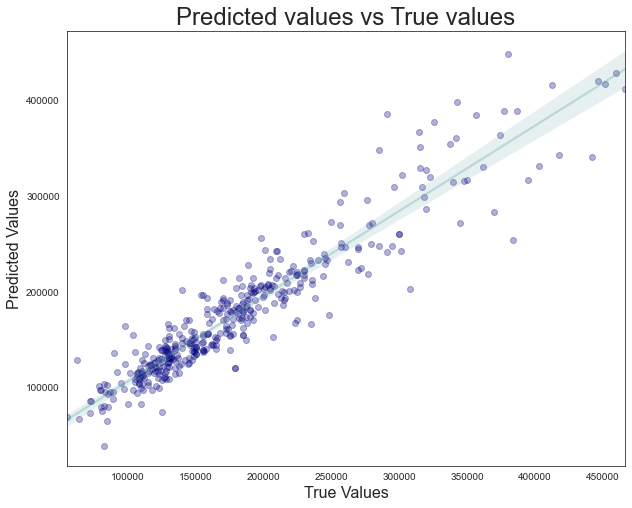

In [69]:
# plot my residuals
plt.figure(figsize = (10,8))

sns.regplot(y_test, y_pred, truncate = True,ci=99,
            scatter_kws = {'color': 'navy', 'alpha': 0.3},
            line_kws = {'color': 'cadetblue', 'alpha': 0.3});


plt.title('Predicted values vs True values', fontsize = 24)
plt.xlabel('True Values', fontsize = 16)
plt.ylabel('Predicted Values', fontsize = 16);

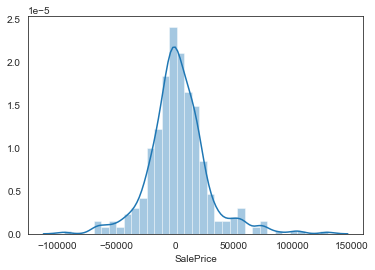

In [70]:
sns.distplot(residuals)

In [71]:
print(f'MSE on testing set: {mean_squared_error(y_train, lr.predict(X_train))}')
print(f'MSE on training set: {mean_squared_error(y_test, y_pred)}')
print(f'MSE of baseline model: {mean_squared_error(y_test, [np.mean(y_train)] * len(y_test))}')

# Check the R^2 on the training and testing sets.

print(f'R^2 on testing set: {r2_score(y_train, lr.predict(X_train))}')
print(f'R^2 on training set: {r2_score(y_test, y_pred)}')
print(f'R^2 of baseline model: {r2_score(y_test, [np.mean(y_train)] * len(y_test))}')

MSE on testing set: 0.02205942579586144
MSE on training set: 651624374.0874927
MSE of baseline model: 38690922875.587685
R^2 on testing set: 0.8684519236395233
R^2 on training set: 0.8873340172899085
R^2 of baseline model: -5.6896681908849995


In [72]:

# how did I do vs baseline? 
print(f'my preds :'residuals.mean()) 

print(f'Baseline :'saleprice_base.mean())

SyntaxError: invalid syntax (<ipython-input-72-51242b0e74f7>, line 2)

In [73]:
#3.01 lab

# Importing the stats model API
import statsmodels.api as sm

# Setting my X and y for modeling
X = sm.add_constant(X, prepend=True)

# The Default here is Linear Regression (ordinary least squares regression OLS)
model = sm.OLS(y,X).fit()

In [74]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.871
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     205.4
Date:                Fri, 09 Oct 2020   Prob (F-statistic):               0.00
Time:                        19:16:54   Log-Likelihood:                 1036.6
No. Observations:                2043   AIC:                            -1941.
Df Residuals:                    1977   BIC:                            -1570.
Df Model:                          65                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         3.1460      0.067     47.083      0.000       3.015       3.277
Lot_Area                      0.2059      0.022      9.273      0.000       0.162       0.249
1st_Flr_SF                    0.3083      0.025     12.572      0.000       0.260       0.356
2nd_Flr_SF                    0.0141      0.003      4.133      0.000       0.007       0.021
Garage_Area                   0.0014      0.003      0.428      0.668      -0.005       0.008
Total_sq                      0.0287      0.020      1.465      0.143      -0.010       0.067
Ratio_lotsq                   0.5404      0.098      5.508      0.000       0.348       0.733
Age                          -0.0030      0.000     -9.419      0.000      -0.004      -0.002
MS_SubClass_20                0.1946      0.024      7.961      0.000       0.147       0.243
MS_SubClass_30                0.1479      0.029      5.150      0.000       0.092       0.204
MS_SubClass_40                0.1771      0.073      2.415      0.016       0.033       0.321
MS_SubClass_45                0.2169      0.049      4.467      0.000       0.122       0.312
MS_SubClass_50                0.2038      0.026      7.928      0.000       0.153       0.254
MS_SubClass_60                0.2348      0.027      8.664      0.000       0.182       0.288
MS_SubClass_70                0.2891      0.030      9.666      0.000       0.230       0.348
MS_SubClass_75                0.3570      0.045      7.919      0.000       0.269       0.445
MS_SubClass_80                0.1901      0.027      7.007      0.000       0.137       0.243
MS_SubClass_85                0.2632      0.036      7.384      0.000       0.193       0.333
MS_SubClass_90                0.3793      0.018     20.571      0.000       0.343       0.415
MS_SubClass_120               0.1237      0.062      1.994      0.046       0.002       0.245
MS_SubClass_160               0.0300      0.066      0.456      0.649      -0.099       0.159
MS_SubClass_180               0.2148      0.078      2.769      0.006       0.063       0.367
MS_SubClass_190               0.1238      0.100      1.232      0.218      -0.073       0.321
MS_Zoning_C                   0.3097      0.044      7.069      0.000       0.224       0.396
MS_Zoning_FV                  0.6190      0.040     15.394      0.000       0.540       0.698
MS_Zoning_I                   0.5722      0.136      4.221      0.000       0.306       0.838
MS_Zoning_RH                  0.5846      0.047     12.415      0.000       0.492       0.677
MS_Zoning_RL                  0.5484      0.030     18.126      0.000       0.489       0.608
MS_Zoning_RM                  0.5121      0.030     16.946      0.000       0.453       0.571
Neighborhood_Blmngtn          0.1148      0.038      3.054      0.002      

In [75]:
def r2_adj(y_true, y_preds, p):
    n = len(y_test)
    y_mean = np.mean(y_test)
    numerator = np.sum(np.square(y_test - y_pred)) / (n - p - 1)
    denominator = np.sum(np.square(y_test - saleprice_base)) / (n - 1)
    return 1 - numerator / denominator

In [76]:
# lab solution 3.01
import sklearn.metrics as metrics
import numpy as np

def lord_of_the_metrics(y_test, y_pred, p):
    mse = metrics.mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    msle = metrics.mean_squared_log_error(y_test, y_pred)
    mae = metrics.median_absolute_error(y_test, y_pred)
    r2 = metrics.r2_score(y_test, y_pred)
    r2a = r2_adj(y_test, y_pred, p)
    
    print('Mean squared error      = ', mse)
    print('Root mean squared error = ', rmse)
    print('Mean squared log error  = ', msle)
    print('Median absolute error   = ', mae)
    print('R^2                     = ', r2)
    print('Adjusted R^2            = ', r2a)
    

In [77]:
lord_of_the_metrics(y_test, y_pred, X.shape[1])

Mean squared error      =  651624374.0874927
Root mean squared error =  25526.93428689573
Mean squared log error  =  0.01910880940515669
Median absolute error   =  12799.475983457582
R^2                     =  0.8873340172899085
Adjusted R^2            =  0.8666467968220954


In [78]:
todf = set(zip(X.columns, np.exp(lr.coef_)))

todf = pd.DataFrame(data=todf).sort_values(by=1,ascending=False)
todf.head()

,0,1
69,Total_sq,1.992571
52,Overall_Qual_8,1.531965
38,Overall_Qual_9,1.508777
67,Lot_Area,1.335920
59,Overall_Qual_7,1.257839


# stage submission

In [ ]:
submission = pd.DataFrame({'Id' : df_test['Id'],
                          'SalePrice' : df_test['y_preds']})
submission.head()

In [ ]:
submission.shape

In [ ]:
# Send submission to dir folder, include "False" to avoid errors

submission.to_csv('9th_sub_LR.csv',index=False)